# Process Arc

In [18]:
# imports
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy import units

from pypeit.core.wave import airtovac

# Load up

In [3]:
hdul = fits.open('HgNeAr_calibrated.fits')
hdul[0].header

MISFILT                        / MIS Filter Number                               [astropy.io.fits.card]
MISFLTID                       / MIS Filter ID                                   [astropy.io.fits.card]


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4094 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2023-05-16T15:50:32' / Date FITS file was generated                  
IRAF-TLM= '2023-05-16T15:50:32' / Time of last modification                     
OBJECT  = 'NeHgNe  '           / Name of the object observed                    
GROUP   =                    0 /                                                
DETECTOR= 'R4K     '              / Detector name                               
GAINDL  =                   10 / Pixel integration time, in sequencer clocks    
PIXITIME=            3.3000E

# Read ASCII

In [4]:
arc = Table.read('calibrated_ascii.txt', format='ascii')
arc.rename_column('col1', 'wave')
arc.rename_column('col2', 'flux')

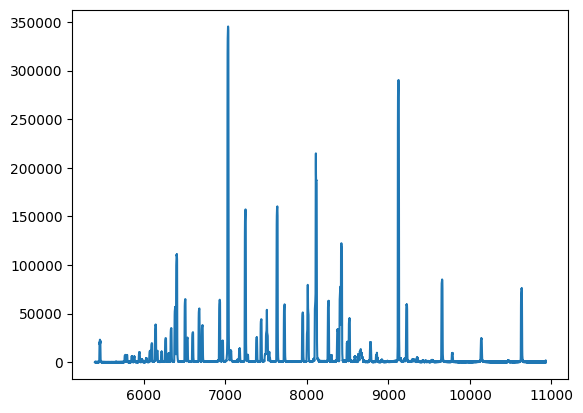

In [5]:
plt.clf()
ax = plt.gca()

ax.plot(arc['wave'], arc['flux'])

plt.show()

# Check ours

In [6]:
arc_file = 'mdm_osmos_r4k_A/Calibrations/Arc_A_0_DET01.fits'

In [7]:
hdul = fits.open(arc_file)
hdul.info()

Filename: mdm_osmos_r4k_A/Calibrations/Arc_A_0_DET01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  ARC_IMAGE     1 ImageHDU        30   (1048, 4060)   float64   
  2  ARC_FULLMASK    1 ImageHDU        31   (1048, 4060)   int16   
  3  ARC_DETECTOR    1 BinTableHDU     63   1R x 19C   [K, K, L, L, D, D, D, D, D, D, D, D, K, 4D, 4D, 64A, 52A, K, 3A]   


In [8]:
img = hdul[1].data
img.shape

(4060, 1048)

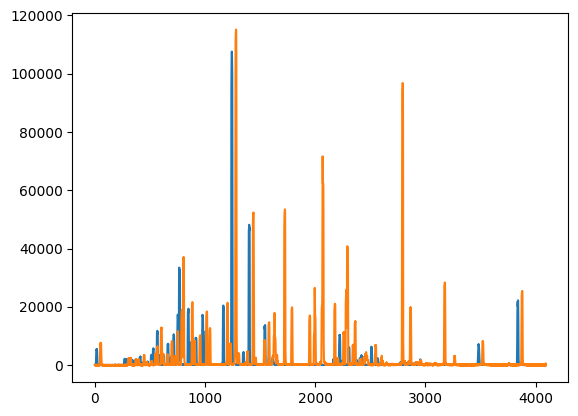

In [9]:
plt.clf()
ax = plt.gca()

ax.plot(img[:, 500])
ax.plot(arc['flux'][::-1]/3)

plt.show()

----

# Generate arxiv

In [11]:
len(arc)

4094

In [13]:
new_tbl = arc.copy()
new_tbl.sort('wave')
new_tbl = new_tbl[0:4060]
new_tbl

wave,flux
float64,float64
5397.65878910331,68.52063
5398.8457750657,296.9929
5400.03293492922,-341.947
5401.22026860811,266.1352
5402.40777601658,-318.547
5403.59545706887,255.3544
5404.78331167926,-355.797
5405.97133976201,250.4979
5407.15954123143,-357.3912


## Add meta

In [15]:
new_tbl.meta['BINSPEC'] = 1.

## Convert to Vacuum

In [19]:
new_tbl['wave'] = airtovac(new_tbl['wave'] * units.AA)

## Write

In [20]:
new_tbl.write('mdm_osmos_r4k.fits')